<a href="https://colab.research.google.com/github/SiddhantV369/predictive-modelling/blob/main/experiment-9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [276]:
import numpy as np

class MySVM:
    def __init__(self, learn_rate=0.001, lambda_val=0.01, n_iter=1000):
        self.learn_rate = learn_rate
        self.lambda_val = lambda_val
        self.n_iter = n_iter
        self.w = None
        self.b = None

    def train_svm(self, X, y):

        y = np.where(y.values == 0, -1, 1)

        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iter):
            for idx, x in enumerate(X.values):
                condition = y[idx] * (np.dot(x, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learn_rate * (2 * self.lambda_val * self.w)
                else:
                    self.w -= self.learn_rate * (2 * self.lambda_val * self.w - y[idx] * x)
                    self.b -= self.learn_rate * y[idx]

        print("weights", self.w)
        print("bias", self.b)

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.where(np.sign(approx) == -1, 0, 1)


In [277]:

df=pd.read_csv('user-data.csv')
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})


/tmp/ipython-input-3179896248.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})


In [278]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[["age","estimated_salary"]]=scaler.fit_transform(df[["age","estimated_salary"]])


In [279]:
from sklearn.model_selection import train_test_split

X=df[['gender','age','estimated_salary']]
y=df['purchased']

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

svm=MySVM()
svm.train_svm(xtrain,ytrain)
ypred= svm.predict(xtest)

accuracy = np.sum(ytest==ypred) / len(ytest)
print("custom model accuracy",accuracy)

weights [0.05721834 1.29710901 0.79437662]
bias 0.7520000000000006
custom model accuracy 0.9125


In [280]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

sklearn_svm = SVC(kernel='linear',C=1.0)

sklearn_svm.fit(xtrain, ytrain)
ypred_sklearn = sklearn_svm.predict(xtest)


accuracy_sklearn = accuracy_score(ytest, ypred_sklearn)

sk_w = sklearn_svm.coef_[0]
sk_b = sklearn_svm.intercept_[0]
print("weights", sk_w)
print("bias", sk_b)

print("sklearn SVM accuracy", accuracy_sklearn)

weights [-0.06026812  1.59832956  0.8897033 ]
bias -0.8242460739432468
sklearn SVM accuracy 0.9125


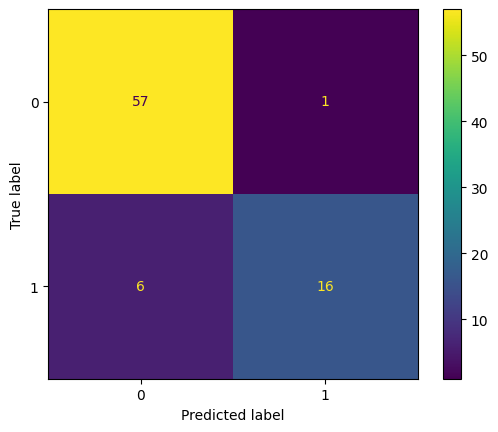

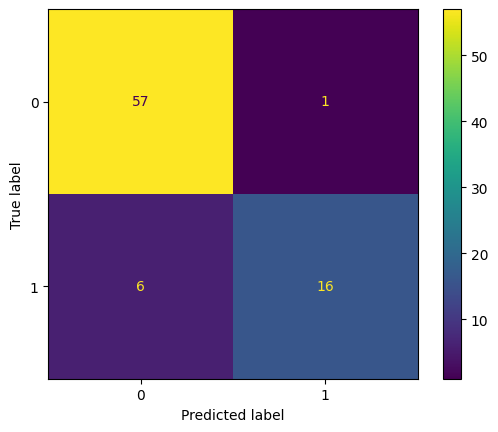

In [281]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_custom = confusion_matrix(ytest, ypred)
disp_custom = ConfusionMatrixDisplay(confusion_matrix=cm_custom, display_labels=[0, 1])


disp_custom.plot()
plt.show()

cm_sklearn = confusion_matrix(ytest, ypred_sklearn)
disp_sklearn = ConfusionMatrixDisplay(confusion_matrix=cm_sklearn, display_labels=[0, 1])


disp_sklearn.plot()
plt.show()

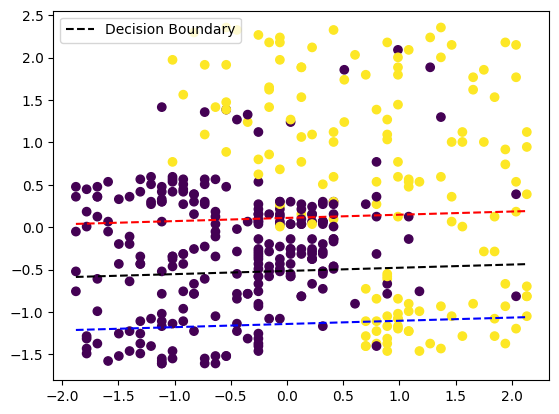

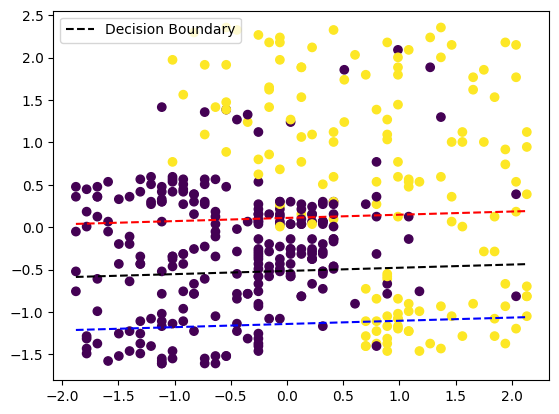

In [282]:
import matplotlib.pyplot as plt
import numpy as np


def plot_svm(svm_model, X, y,w,b):

  def hyperplane(x, w, b, e):
    return (-w[0] * x + b + e) / w[1]

  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)


  scatter = ax.scatter(X['age'], X['estimated_salary'], c=y)



  x_0 = np.linspace(X['age'].min(), X['age'].max(), 100)

  y_0 = hyperplane(x_0, w, b, 0)
  ax.plot(x_0, y_0, 'k--', label='Decision Boundary')

  y_1 = hyperplane(x_0, w, b, 1)
  ax.plot(x_0, y_1, 'r--', )

  y_minus_1 = hyperplane(x_0, w, b, -1)
  ax.plot(x_0, y_minus_1, 'b--', )


  plt.legend()
  plt.show()


plot_svm(svm, X, y,w,b)        # custom svm func

w = sklearn_svm.coef_[0]
b = sklearn_svm.intercept_[0]

plot_svm(sklearn_svm,X,y,w,b)     #sklearn svm